In [1]:
import os
import numpy as np
import pandas as pd
from astropy.coordinates import Angle
import astropy.units as u
from tess_stars2px import tess_stars2px_function_entry
import tessreduce as tr

/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read data from TNS
df = pd.read_csv('data/tns_search_tde.csv')

In [3]:
def get_coords(df):
    # Convert RA & DEC to degrees
    ra_deg = df['RA'].apply(lambda x: Angle(x, unit=u.hourangle).degree)
    dec_deg = df['DEC'].apply(lambda x: Angle(x, unit=u.deg).degree)
    coords_deg = list(zip(ra_deg, dec_deg))
    return coords_deg

In [4]:
def tess_reduce_set(coords_deg, name):
    print(f"Processing {name}")
    os.makedirs(f'data/plots/{name}', exist_ok=True)
    os.makedirs(f'data/lightcurves/{name}', exist_ok=True)
    
    for ra, dec in coords_deg:
        print(f"\nRA: {ra:.6f}, DEC: {dec:.6f}")
        # TESS point
        ticid = 0 # code doesn't actually use ticid
        print('outID outSec outCam outCcd outColPix outRowPix')
        outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(ticid, ra, dec)
        for i in range(len(outID)):
            print('{0:d} {1:d} {2:d} {3:d} {4:f} {5:f}'.format(outID[i], outSec[i], outCam[i], outCcd[i], outColPix[i], outRowPix[i]))
            # TESS reduce
            tess = tr.tessreduce(ra=ra, dec=dec, sector=outSec[i], savename=f'data/plots/{name}/ra{ra}_dec{dec}_sec{outSec[i]}', parallel=True)
            if tess.lc is None:
                tess = tr.tessreduce(ra=ra, dec=dec, sector=outSec[i], savename=f'data/plots/{name}/ra{ra}_dec{dec}_sec{outSec[i]}', parallel=False)
            try:
                tess_lc_tp = tess.lc.T
                np.savez(f'data/lightcurves/{name}/ra{ra}_dec{dec}_sec{outSec[i]}.npz', lightcurve=tess_lc_tp)
            except Exception as e:
                continue

In [ ]:
name22 = '2022dbl'
df22 = df[(df['Redshift'] < 0.03) & (df['Name'] == f'TDE {name22}')]
coords22 = get_coords(df22)
tess_reduce_set(coords22, name22)


RA: 185.187542, DEC: 49.551300
outID outSec outCam outCcd outColPix outRowPix
0 22 2 2 593.752061 1365.403891
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
aligning images
Something went wrong, switching to serial
!!Re-running for difference image!!
Traceback (most recent call last):
  File "/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tessreduce/tessreduce.py", line 1940, in reduce
    self.shift_images()
    ~~~~~~~~~~~~~~~~~^^
  File "/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/tessreduce/tessreduce.py", line 957, in shift_images
    shifted[i] = shift(shifted[i],[self.shift[i,0],self.shift[i,1]],mode='nearest',order=5)#mode='constant',cval=np.nan)
                                   ~~~~~~~~~~^^^^^
TypeError: 'NoneType' object is not subscriptable

getting TPF from TESScut
made reference


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


made source mask
calculating background



RA: 71.657833, DEC: -10.226361
outID outSec outCam outCcd outColPix outRowPix
0 5 2 3 1767.705411 435.713892
getting TPF from TESScut
made reference


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


made source mask
calculating background


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel subm

background subtracted
aligning images
!!! skernel 118
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


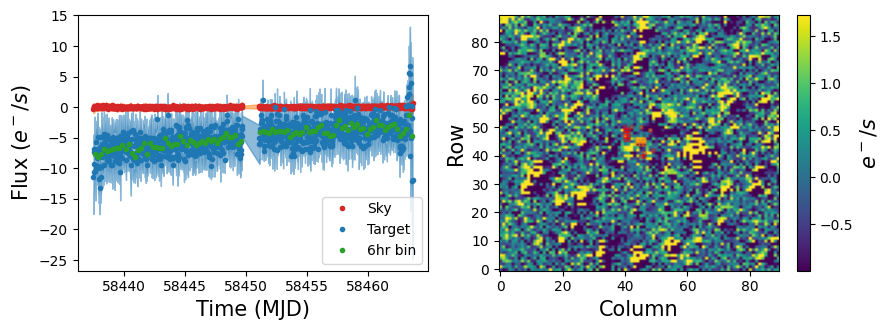

High correlation between lc and x shift: 0.65
0 32 2 4 391.020847 437.884244
getting TPF from TESScut
made reference
made source mask
calculating background
background subtracted
aligning images
!!! skernel 359
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


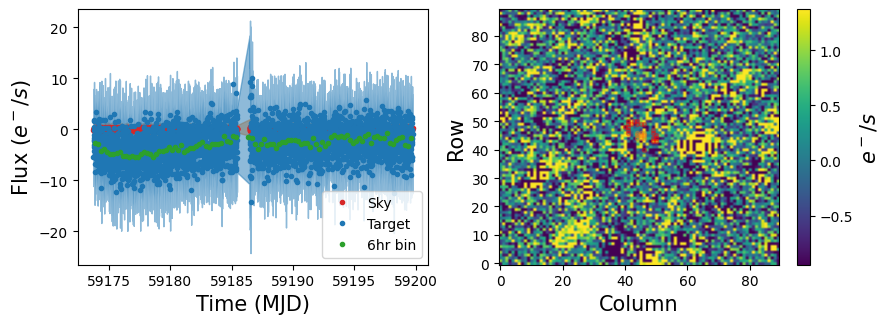

0 98 2 4 1036.632808 465.290182
getting TPF from TESScut


ValueError: Failure in TESScut api, not sure why.

In [10]:
name19 = '2019qiz'
df19 = df[(df['Redshift'] < 0.03) & (df['Name'] == f'TDE {name19}')]
coords19 = get_coords(df19)
tess_reduce_set(coords19, name19)

['2022gri', '2022dsb', '2022dbl', '2021ehb', '2020afhd', '2020wey', '2019qiz', '2019azh', '2019ahk', '2018meh', '2018dyb', '2016fnl']
Processing 2021ehb

RA: 46.949192, DEC: 40.311269
outID outSec outCam outCcd outColPix outRowPix
0 18 1 1 1566.556407 1441.262862
getting TPF from TESScut
made reference


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


made source mask
calculating background


/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/Users/wendysun/Desktop/QPE_TESS_2025summer/stats/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel subm

background subtracted
aligning images
!!! skernel 111
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


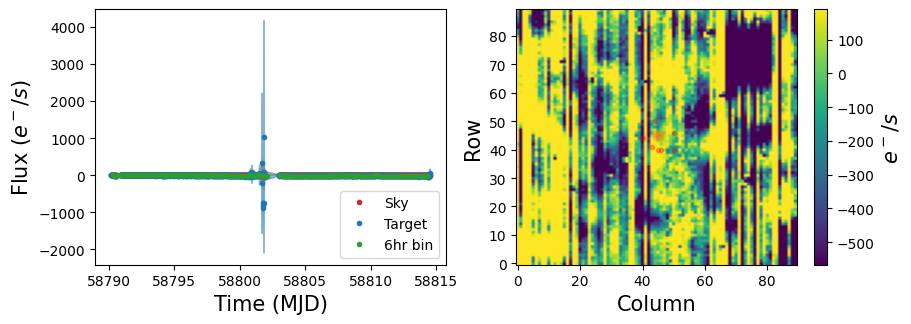

0 58 1 1 1128.643989 1700.666157
getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
aligning images
!!! skernel 1170
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


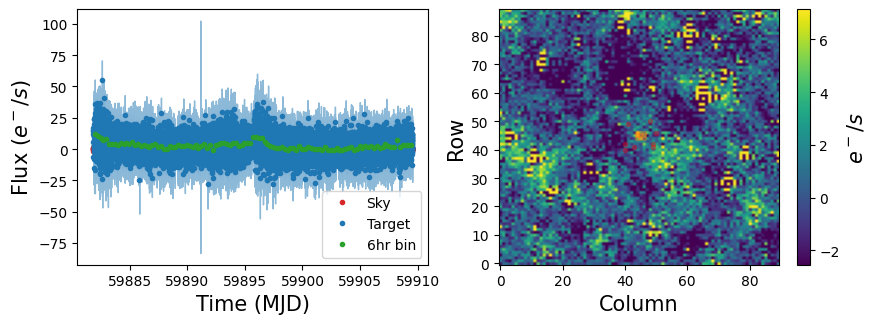

0 85 1 1 592.131509 1680.681236
getting TPF from TESScut
made reference
!!!WARNING!!! mask is too dense, lowering mask_scale to 0.5, and raising maglim to 15. Background quality will be reduced.
made source mask
calculating background
background subtracted
aligning images
!!! skernel 1029
!!Re-running for difference image!!
shifting images
remade mask
background
background correlation correction
field calibration
target is above -30 dec, calibrating to PS1 photometry.


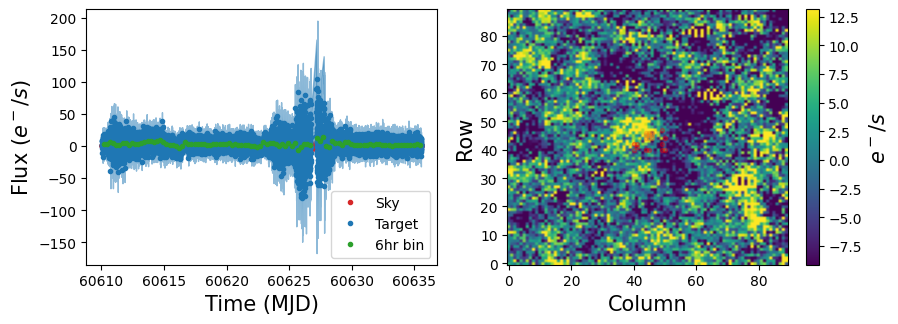

In [6]:
df_all = df[(df['Redshift'] < 0.03)]
names = [name[4:] for name in df_all['Name'].unique()]
print(names)

for name in names:
    if name != '2021ehb':
        continue
    df_subset = df[(df['Redshift'] < 0.03) & (df['Name'] == f'TDE {name}')]
    coords_subset = get_coords(df_subset)
    tess_reduce_set(coords_subset, name)